In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector
import os
import subprocess
import gc
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.interpolate import interp1d
print("uproot version", uproot.__version__)
print("awkward version", ak.__version__)
print("numpy version", np.__version__)
print("matplotlib version", matplotlib.__version__)
print("hist version", hist.__version__)
print("vector version", vector.__version__)
#print("os version", os.__version__)
#print("subprocess version", subprocess.__version__)
#print("gc version", gc.__version__)
print("pandas version", pd.__version__)
#print("scipy.optimize version", scipy.optimize.__version__)
#print("scipy.integrate version", scipy.integrate.__version__)

uproot version 5.0.12
awkward version 2.4.3
numpy version 1.25.2
matplotlib version 3.8.0
hist version 2.7.2
vector version 1.1.1
pandas version 1.5.3


In [2]:
X = [1.5174999999999998, 1.5525, 1.5875, 1.6225, 1.6574999999999998, 1.6925, 1.7275, 1.7625000000000002, 
     1.7975, 1.8325, 1.8675000000000002, 1.9025000000000003, 1.9375, 1.9725, 2.0075, 2.0425, 2.0775, 2.1125, 
     2.1475, 2.1825, 2.2175000000000002, 2.2525, 2.2875, 2.3225, 2.3575, 2.3925, 2.4275, 2.4625, 2.4975, 
     2.5324999999999998, 2.5675, 2.6025, 2.6375, 2.6725000000000003, 2.7075, 2.7424999999999997, 2.7775, 
     2.8125, 2.8475, 2.8825000000000003, 2.9175000000000004, 2.9524999999999997, 2.9875, 3.0225, 3.0575, 
     3.0925, 3.1275, 3.1625, 3.1975, 3.2325, 3.2675, 3.3025, 3.3375, 3.3725000000000005, 3.4074999999999998, 
     3.4425000000000003, 3.4775, 3.5125, 3.5475, 3.5824999999999996, 3.6174999999999997, 3.6525000000000003, 
     3.6875, 3.7224999999999997, 3.7575000000000003, 3.7925000000000004, 3.8275, 3.8625, 3.8975, 
     3.9324999999999997, 3.9675, 4.0024999999999995, 4.0375, 4.0725, 4.1075, 4.1425, 4.1775, 4.2125, 
     4.2475000000000005, 4.2825, 4.3175, 4.352499999999999, 4.3875, 4.422499999999999, 4.4575, 
     4.492500000000001, 4.5275, 4.5625, 4.5975, 4.632499999999999, 4.6675, 4.702500000000001, 4.7375, 
     4.772500000000001, 4.8075, 4.842499999999999, 4.8775, 4.9125, 4.9475, 4.9825]

start = X[0] - (X[1] - X[0])/2
stop = X[-1] + (X[1] - X[0])/2
bins = len(X)

In [3]:
# eventsCuts: isCMUL == True
# tracksCuts: -4.0 < eta < -2.5; pt > 0.5; 2° < thetaAbs < 10°
# pairsCuts: -4.0 < rapidity < -3.7

Y_OS = [3840.0, 3677.0, 3490.0, 3364.0, 3125.0, 3045.0, 2947.0, 2883.0, 2661.0, 2613.0, 2384.0, 
        2239.0, 2293.0, 2067.0, 1997.0, 1894.0, 1849.0, 1665.0, 1676.0, 1588.0, 1569.0, 1480.0, 
        1330.0, 1222.0, 1367.0, 1264.0, 1147.0, 1088.0, 1076.0, 1090.0, 921.0, 885.0, 886.0, 
        888.0, 919.0, 869.0, 843.0, 916.0, 992.0, 1012.0, 1277.0, 1584.0, 2041.0, 2551.0, 3176.0, 
        3188.0, 2896.0, 2143.0, 1579.0, 994.0, 745.0, 545.0, 468.0, 397.0, 357.0, 326.0, 322.0, 
        307.0, 287.0, 265.0, 281.0, 281.0, 264.0, 249.0, 240.0, 197.0, 216.0, 181.0, 152.0, 162.0, 
        136.0, 129.0, 151.0, 159.0, 127.0, 133.0, 143.0, 127.0, 111.0, 105.0, 110.0, 116.0, 94.0,
        110.0, 98.0, 92.0, 79.0, 102.0, 84.0, 101.0, 78.0, 83.0, 63.0, 63.0, 73.0, 77.0, 61.0, 73.0, 
        60.0, 62.0]

vMass_OS = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_OS.fill(X, weight = Y_OS)

Y_LS = [605.0, 605.0, 555.0, 544.0, 579.0, 572.0, 607.0, 542.0, 490.0, 498.0, 494.0, 454.0, 433.0, 
        423.0, 399.0, 451.0, 404.0, 378.0, 379.0, 350.0, 377.0, 366.0, 346.0, 310.0, 315.0, 341.0, 
        300.0, 301.0, 312.0, 263.0, 269.0, 251.0, 220.0, 221.0, 228.0, 213.0, 219.0, 211.0, 189.0, 
        202.0, 217.0, 213.0, 200.0, 182.0, 219.0, 168.0, 149.0, 167.0, 149.0, 139.0, 132.0, 138.0, 
        137.0, 146.0, 135.0, 124.0, 115.0, 109.0, 100.0, 110.0, 111.0, 94.0, 90.0, 91.0, 90.0, 81.0, 
        75.0, 86.0, 76.0, 76.0, 81.0, 77.0, 64.0, 71.0, 69.0, 60.0, 51.0, 55.0, 49.0, 61.0, 47.0, 39.0, 
        59.0, 42.0, 36.0, 45.0, 44.0, 46.0, 41.0, 31.0, 45.0, 38.0, 33.0, 46.0, 35.0, 27.0, 36.0, 26.0, 
        23.0, 34.0]

vMass_LS = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_LS.fill(X, weight = Y_LS)

Y_JPsi = [12.0, 6.0, 17.0, 5.0, 11.0, 14.0, 13.0, 16.0, 23.0, 18.0, 22.0, 22.0, 26.0, 25.0, 
          42.0, 31.0, 34.0, 37.0, 39.0, 45.0, 52.0, 39.0, 56.0, 56.0, 64.0, 77.0, 97.0, 126.0, 
          117.0, 132.0, 143.0, 159.0, 237.0, 274.0, 338.0, 422.0, 475.0, 640.0, 897.0, 1169.0, 
          1601.0, 2484.0, 3848.0, 6007.0, 8180.0, 9444.0, 8342.0, 5538.0, 2992.0, 1528.0, 702.0, 
          398.0, 268.0, 189.0, 134.0, 93.0, 98.0, 63.0, 42.0, 38.0, 32.0, 28.0, 26.0, 14.0, 17.0, 
          18.0, 14.0, 10.0, 12.0, 9.0, 8.0, 1.0, 4.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 1.0, 2.0, 
          1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 1.0]

vMass_JPsi = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_JPsi.fill(X, weight = Y_JPsi)

Y_Psi = [5.0, 5.0, 3.0, 1.0, 2.0, 5.0, 0.0, 7.0, 3.0, 5.0, 3.0, 7.0, 5.0, 6.0, 9.0, 9.0, 9.0, 6.0, 
         10.0, 11.0, 12.0, 12.0, 13.0, 11.0, 12.0, 16.0, 12.0, 12.0, 20.0, 16.0, 18.0, 24.0, 25.0, 
         33.0, 28.0, 28.0, 36.0, 28.0, 32.0, 49.0, 28.0, 48.0, 62.0, 54.0, 54.0, 74.0, 94.0, 94.0, 
         138.0, 120.0, 162.0, 192.0, 263.0, 263.0, 376.0, 468.0, 619.0, 857.0, 1367.0, 2044.0, 3014.0, 
         4067.0, 4535.0, 3923.0, 2588.0, 1415.0, 665.0, 322.0, 195.0, 120.0, 99.0, 74.0, 39.0, 31.0, 
         27.0, 25.0, 22.0, 5.0, 17.0, 15.0, 11.0, 9.0, 5.0, 6.0, 8.0, 7.0, 5.0, 3.0, 7.0, 9.0, 0.0, 
         3.0, 4.0, 2.0, 2.0, 3.0, 4.0, 1.0, 1.0, 1.0]

vMass_Psi = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_Psi.fill(X, weight = Y_Psi)

Y_MC = [17.0, 11.0, 20.0, 6.0, 13.0, 19.0, 13.0, 23.0, 26.0, 23.0, 25.0, 29.0, 31.0, 31.0, 51.0, 
        40.0, 43.0, 43.0, 49.0, 56.0, 64.0, 51.0, 69.0, 67.0, 76.0, 93.0, 109.0, 138.0, 137.0, 
        148.0, 161.0, 183.0, 262.0, 307.0, 366.0, 450.0, 511.0, 668.0, 929.0, 1218.0, 1629.0, 
        2532.0, 3910.0, 6061.0, 8234.0, 9518.0, 8436.0, 5632.0, 3130.0, 1648.0, 864.0, 590.0, 
        531.0, 452.0, 510.0, 561.0, 717.0, 920.0, 1409.0, 2082.0, 3046.0, 4095.0, 4561.0, 3937.0, 
        2605.0, 1433.0, 679.0, 332.0, 207.0, 129.0, 107.0, 75.0, 43.0, 34.0, 29.0, 28.0, 25.0, 8.0, 
        21.0, 18.0, 12.0, 11.0, 6.0, 7.0, 9.0, 8.0, 7.0, 5.0, 8.0, 10.0, 1.0, 6.0, 7.0, 4.0, 4.0, 4.0, 
        5.0, 1.0, 1.0, 2.0]

vMass_MC = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_MC.fill(X, weight = Y_MC)

Hist(Regular(100, 1.5, 5, name='$m_{\\mu \\mu}$', label='X'), storage=Double()) # Sum: 87472.0

In [4]:
def CB2(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    return np.piecewise(x, 
                        [( x - mu )/sig < -1 * alphaL, (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , ( x - mu )/sig > alphaR],
                        [lambda x: N * AL * (BL - (( x - mu )/sig))**(-nL), lambda x: N * np.exp(-1 * (( x - mu )/sig)**2 / 2), lambda x: N * AR * (BR + ( x - mu )/sig)**(-nR)])

def NA60(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
    return np.piecewise(x, 
                        [(x - mu)/sig < alphaL, 
                         ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                         (x - mu)/sig > alphaR],
                        [lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1L * (alphaL - (x - mu)/sig)**(p2L - p3L * np.sqrt(alphaL - (x - mu)/sig)))**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1R * ((x - mu)/sig - alphaR)**(p2R - p3R * np.sqrt((x - mu)/sig - alphaR)))**2)])

def VWG(x, N, mu, alpha, beta):
    sigma = alpha + beta*((x-mu)/mu)
    return N * np.exp(-(x - mu)**2 / (2*sigma**2))

def PR(x, N, a1, b1, b2):
    return N * (1 + a1*x) / (b1*x + b2*x)

def DE(x, N, alpha, beta1, beta2):
    return N * (np.exp(beta1*x) + alpha * np.exp(beta2*x))

def test(x, y1, y2, y3, y4, y5):
    x0 = [1.5, 2.5, 3.45, 3.8, 5]
    return interp1d([*x0], [y1, y2, y3, y4, y5], kind = 'cubic', bounds_error = False, fill_value = "extrapolate")(x)

def test2(x, y1, y2, y3, y4, y5):
    return np.exp(test(x, y1, y2, y3, y4, y5))

In [5]:
def fixedFunc_JPsi(x, N1, mu1, sig1):
    return func_JPsi(x, N1, mu1, sig1, alphaL1, nL1, alphaR1, nR1)

def fixedFunc_Psi(x, N2, mu2, sig2):
    return func_Psi(x, N2, mu2, sig2, alphaL2, nL2, alphaR2, nR2)

def fixedFunc_MC(x, N1, mu1, sig1, N2, mu2, sig2):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2)

def fixedFunc_bckg(x, y1, y2, y3, y4, y5):
    return func_bckg(x, y1, y2, y3, y4, y5)

def fixedFitFunc(x,
                 N1, mu1, sig1,
                 N2, mu2, sig2,
                y1, y2, y3, y4, y5):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2) + fixedFunc_bckg(x, y1, y2, y3, y4, y5)

condition_x_range = lambda x_data: (x_data < 4.75)
func_JPsi = CB2
func_Psi = CB2
func_bckg = test2
func_MC = fixedFunc_MC
func = fixedFitFunc

In [6]:
x_data = np.array(X)
y_data = np.array(vMass_JPsi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

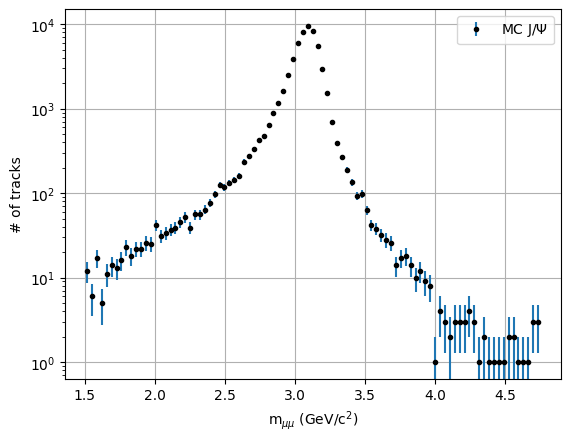

In [7]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [8]:
p0_JPsi = np.array([136241.85680339273, 3.1003675365856544, 0.0630318569252801, 0.993869592186634, 3.0340276033125493, 2.233482641523906, 2.705629560440874])

In [9]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_JPsi, pcov_JPsi, nfev_JPsi, fvec_JPsi, fjac_JPsi = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_JPsi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_JPsi))
print("pcov: \n", pcov_JPsi)
print("residual: \n", nfev_JPsi)

popt: 
 [9344.342334630133, 3.08975853414339, 0.07210095049347394, 1.079168366023733, 2.953464895895564, 1.6958022879868582, 3.142083609196618]
pcov: 
 [[ 6.21641610e+03  1.06577432e-02 -3.98611740e-02 -3.43758334e-01
   3.44465462e-01 -7.63837408e-01  1.50499675e+00]
 [ 1.06577432e-02  4.02272730e-07 -2.00920148e-07 -7.16474351e-06
   2.02663269e-05 -3.72449406e-07 -5.77995105e-06]
 [-3.98611740e-02 -2.00920148e-07  5.45257852e-07  9.66518349e-06
  -1.88269844e-05  1.42347062e-05 -2.84864850e-05]
 [-3.43758334e-01 -7.16474351e-06  9.66518349e-06  4.38153005e-04
  -1.54966253e-03  2.31798571e-04 -4.02400909e-04]
 [ 3.44465462e-01  2.02663269e-05 -1.88269844e-05 -1.54966253e-03
   7.89599117e-03 -3.83479339e-04  5.30127006e-04]
 [-7.63837408e-01 -3.72449406e-07  1.42347062e-05  2.31798571e-04
  -3.83479339e-04  1.23077426e-03 -4.30771581e-03]
 [ 1.50499675e+00 -5.77995105e-06 -2.84864850e-05 -4.02400909e-04
   5.30127006e-04 -4.30771581e-03  2.21305070e-02]]
residual: 
 {'nfev': 17, 'fv

fit error : 78.84445315922345


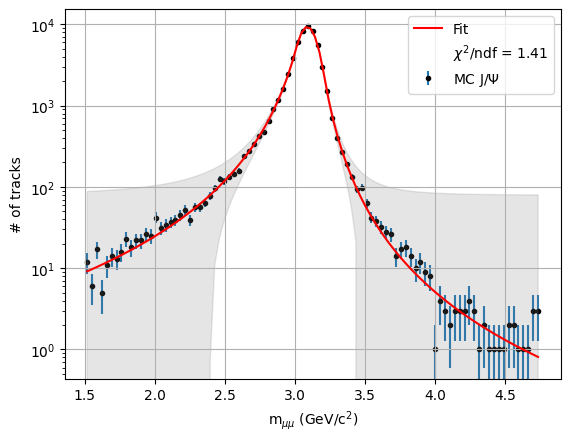

In [10]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_JPsi(x_fit, *popt_JPsi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_JPsi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_JPsi(x_data, *popt_JPsi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_JPsi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

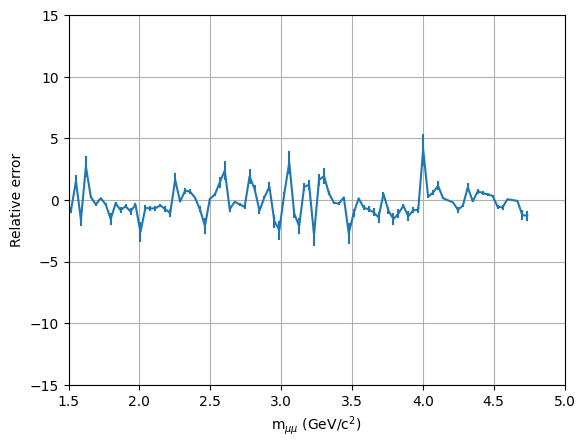

In [11]:
err = np.sqrt(nfev_JPsi["fvec"]**2/(nfev_JPsi["nfev"]-len(popt_JPsi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_JPsi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [12]:
x_data = np.array(X)
y_data = np.array(vMass_Psi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

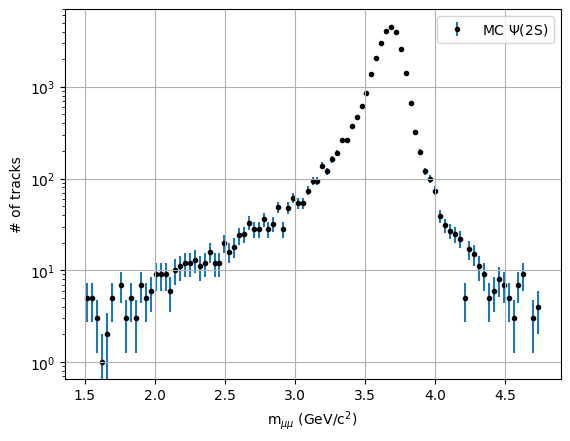

In [13]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [14]:
p0_Psi = np.array([67449.51297432544, 3.693248662583962, 0.06511527893660865, 0.9607870324016564, 2.849198115287005, 2.283717751711943, 2.5497581009488974])

In [15]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_Psi, pcov_Psi, nfev_Psi, fvec_Psi, fjac_Psi = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_Psi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_Psi))
print("pcov: \n", pcov_Psi)
print("residual: \n", nfev_Psi)

popt: 
 [4489.612822480028, 3.6809618042419965, 0.07396478763295102, 1.072137311334837, 2.623782073956029, 1.8177093661833128, 2.6192912911336546]
pcov: 
 [[ 2.55398775e+03  1.02622597e-02 -3.38331169e-02 -2.42100033e-01
   1.86848339e-01 -7.16782462e-01  1.63483223e+00]
 [ 1.02622597e-02  7.99405211e-07 -4.17092399e-07 -1.29215580e-05
   2.79054296e-05 -1.32796278e-06 -7.81449950e-06]
 [-3.38331169e-02 -4.17092399e-07  9.89262679e-07  1.60695208e-05
  -2.45466739e-05  2.84699469e-05 -6.25360745e-05]
 [-2.42100033e-01 -1.29215580e-05  1.60695208e-05  6.74628184e-04
  -1.83676844e-03  4.20846926e-04 -8.20300966e-04]
 [ 1.86848339e-01  2.79054296e-05 -2.45466739e-05 -1.83676844e-03
   7.26625387e-03 -5.34008081e-04  8.74190140e-04]
 [-7.16782462e-01 -1.32796278e-06  2.84699469e-05  4.20846926e-04
  -5.34008081e-04  3.17243618e-03 -1.07880474e-02]
 [ 1.63483223e+00 -7.81449950e-06 -6.25360745e-05 -8.20300966e-04
   8.74190140e-04 -1.07880474e-02  4.74612908e-02]]
residual: 
 {'nfev': 15, 

fit error : 50.537573404771564


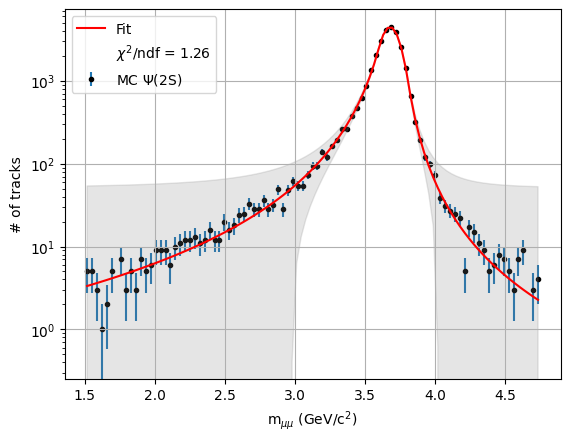

In [16]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_Psi(x_fit, *popt_Psi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_Psi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_Psi(x_data, *popt_Psi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_Psi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

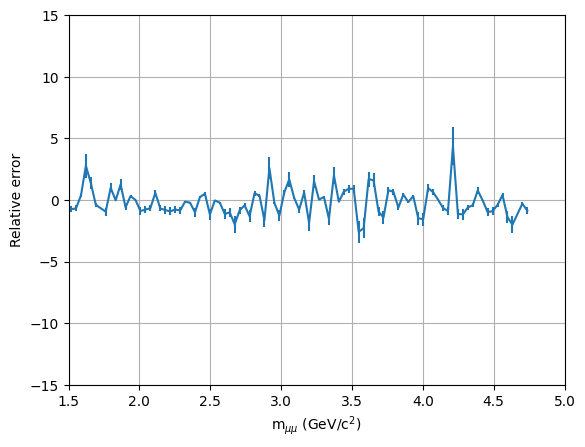

In [17]:
err = np.sqrt(nfev_Psi["fvec"]**2/(nfev_Psi["nfev"]-len(popt_Psi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_Psi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [18]:
x_data = np.array(X)
y_data = np.array(vMass_MC)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

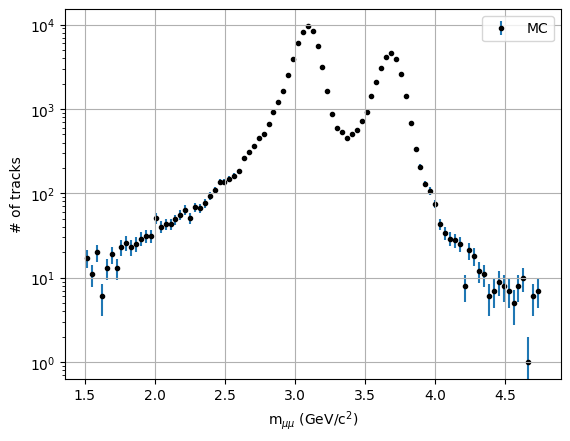

In [19]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [20]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1= popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

p0_MC = np.array([N1, mu1, sig1, N2, mu2, sig2])

In [21]:
def mklb(p0, var):
    return p0*(1-np.sign(p0)*var)

def mkub(p0, var):
    return p0*(1+np.sign(p0)*var)

varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0_MC[:3],varpks), *mklb(p0_MC[3:6],varpks)])
ub = np.array([*mkub(p0_MC[:3],varpks), *mkub(p0_MC[3:6],varpks)])
bounds = (lb,ub)

In [22]:
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, method = 'trf', full_output = True)
popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_MC))
print("pcov: \n", pcov_MC)
print("residual: \n", nfev_MC)

popt: 
 [9340.96695018866, 3.0897249715843746, 0.0721529775134849, 4491.542557816747, 3.680889454517169, 0.07413116767931577]
pcov: 
 [[ 6.16730427e+03  5.58436393e-03 -2.77279831e-02 -2.69768429e+01
  -1.37248038e-03  1.97195816e-03]
 [ 5.58436393e-03  2.95742345e-07 -4.00371644e-08  1.44077045e-04
   8.92966954e-09 -9.77508757e-09]
 [-2.77279831e-02 -4.00371644e-08  2.32351630e-07  8.30862474e-04
   2.99944136e-08 -4.65041963e-08]
 [-2.69768429e+01  1.44077045e-04  8.30862474e-04  2.87431126e+03
   8.26084083e-03 -2.84866714e-02]
 [-1.37248038e-03  8.92966954e-09  2.99944136e-08  8.26084083e-03
   6.66196928e-07 -1.78568607e-07]
 [ 1.97195816e-03 -9.77508757e-09 -4.65041963e-08 -2.84866714e-02
  -1.78568607e-07  5.41039881e-07]]
residual: 
 {'nfev': 4, 'fvec': array([-1.08507124,  0.67842575, -1.3342396 ,  3.62585029,  0.77723846,
       -0.50382477,  1.35769561, -0.81591191, -1.09994829, -0.2456013 ,
       -0.32089764, -0.71861646, -0.70984946, -0.3280152 , -2.7252478 ,
       -0.9

fit error : 95.0874099477453


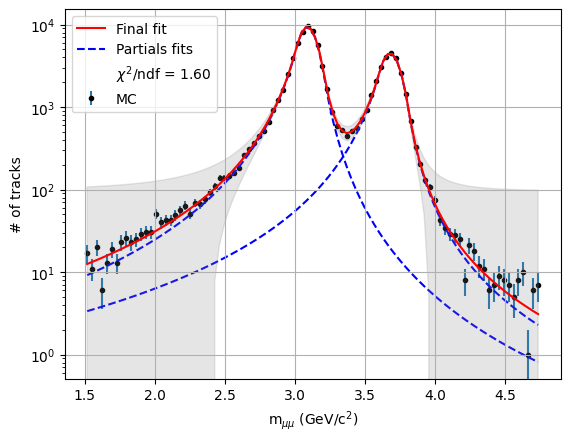

In [23]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_MC(x_fit, *popt_MC)
plt.plot(x_fit, y_fit, '-r', label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt_MC[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt_MC[3:6]), '--b', zorder = 1)

sigmas = np.diag(pcov_MC)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_MC(x_data, *popt_MC)) / y_error) ** 2)
ndf = len(x_data) + len(popt_MC) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_10280/4254452161.py:1: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))


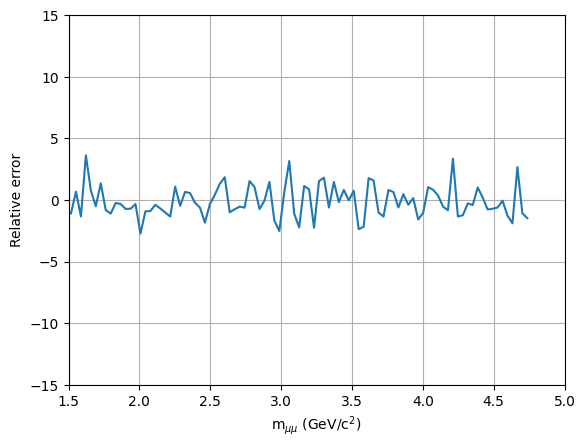

In [24]:
err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_MC["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [25]:
x_data = np.array(X)
y_data = np.array(vMass_LS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

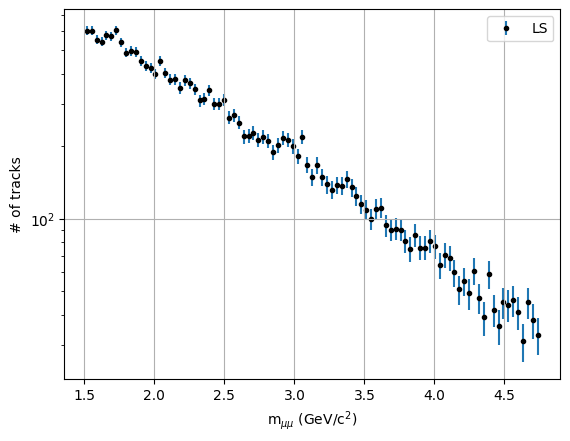

In [26]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [27]:
p0_bckg = np.array([1,1,1,1,1])

In [28]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_bckg, pcov_bckg, nfev_bckg, fvec_bckg, fjac_bckg = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_bckg, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_bckg))
print("pcov: \n", pcov_bckg)
print("residual: \n", nfev_bckg)

popt: 
 [6.44665996281932, 5.647105204053056, 4.7852111967577, 4.442588974331324, 3.289645115194079]
pcov: 
 [[ 4.55105086e-04 -7.75969450e-05  9.40379741e-05 -6.64719179e-06
   6.98545914e-04]
 [-7.75969450e-05  1.20439675e-04  2.78030698e-05 -2.17722562e-05
   2.10379322e-04]
 [ 9.40379741e-05  2.78030698e-05  2.77184359e-04  2.34948914e-04
  -2.02088785e-04]
 [-6.64719179e-06 -2.17722562e-05  2.34948914e-04  4.82948791e-04
  -2.10315273e-03]
 [ 6.98545914e-04  2.10379322e-04 -2.02088785e-04 -2.10315273e-03
   2.95262257e-02]]
residual: 
 {'nfev': 16, 'fvec': array([ 0.70697129,  0.05060348,  1.50457101,  1.32850698, -0.79539513,
       -1.12620249, -3.10124596, -1.09787149,  0.56927009, -0.40013582,
       -0.81690873,  0.41837131,  0.83036413,  0.72599613,  1.34506997,
       -1.73837665, -0.0710972 ,  0.68553384,  0.06933243,  1.0493005 ,
       -0.91848771, -0.89112017, -0.37723367,  1.0936218 ,  0.26841126,
       -1.65142447,  0.08503152, -0.48045732, -1.58094445,  0.78313199,


fit error : 0.17567556354368366


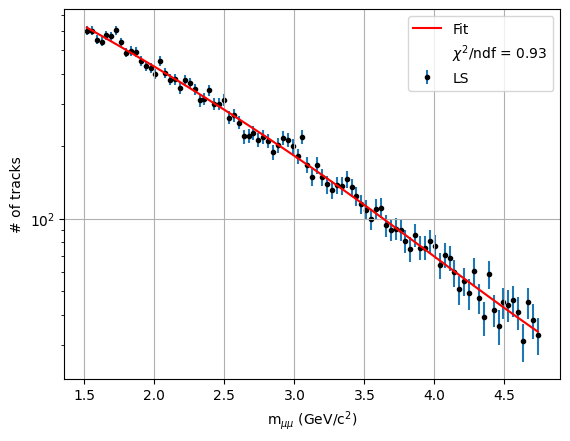

In [29]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_bckg(x_fit, *popt_bckg)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_bckg)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_bckg(x_data, *popt_bckg)) / y_error) ** 2)
ndf = len(x_data) + len(popt_bckg) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

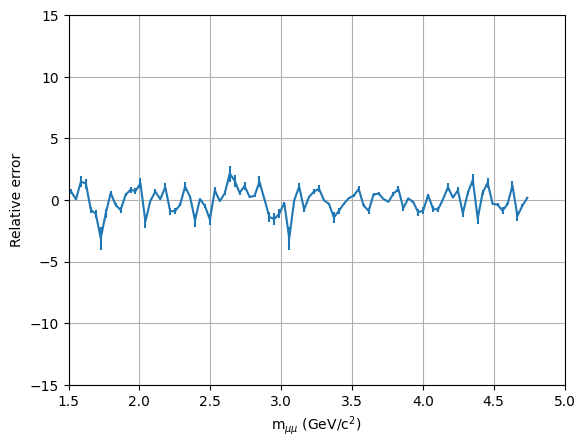

In [30]:
err = np.sqrt(nfev_bckg["fvec"]**2/(nfev_bckg["nfev"]-len(popt_bckg)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_bckg["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [31]:
x_data = np.array(X)
y_data = np.array(vMass_OS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

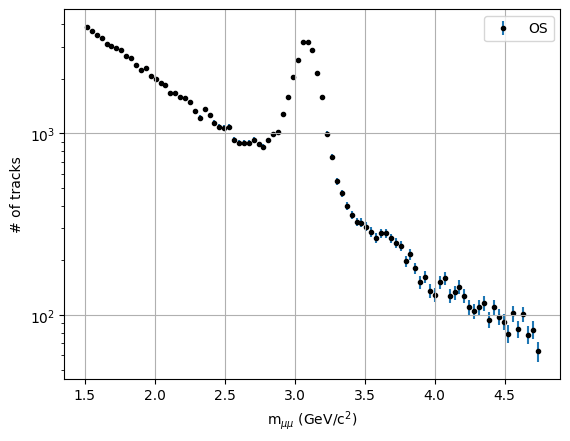

In [32]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [33]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1 = popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

y1 = popt_bckg[0]
y2 = popt_bckg[1]
y3 = popt_bckg[2]
y4 = popt_bckg[3]
y5 = popt_bckg[4]

p0 = np.array([N1, mu1, sig1, N2, mu2, sig2,  y1, y2, y3, y4, y5])

In [34]:
varbg = np.ones(np.shape(p0[6:]))*1# bg parameters variation factor around p0
varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0[:3],varpks), *mklb(p0[3:6],varpks), *mklb(p0[6:],varbg)])
ub = np.array([*mkub(p0[:3],varpks), *mkub(p0[3:6],varpks), *mkub(p0[6:],varbg)])
bounds = (lb,ub)

In [35]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, method = 'trf', full_output = True)
popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt))
print("pcov: \n", pcov)
print("residual: \n", nfev)

popt: 
 [2887.827719591051, 3.0855701798919695, 0.07931104554282133, 44.3926912132892, 3.681792422357597, 0.07406769854382171, 8.28164155430221, 6.9247334860355, 5.671714014317577, 5.240884123416071, 4.1835741447150125]
pcov: 
 [[ 2.39727558e+03  6.96490555e-03 -4.18335611e-02  1.27555206e+01
  -4.38048149e-02  7.55640245e-02 -2.55232723e-02 -1.81926359e-02
  -8.63410923e-02 -4.80037977e-02 -1.10586704e-01]
 [ 6.96490555e-03  1.87049874e-06 -5.88511968e-07 -3.49677292e-04
   1.66302883e-06 -2.49207155e-06  6.07019705e-07  2.97724916e-06
   5.27513270e-06  1.80975993e-06  1.43770510e-05]
 [-4.18335611e-02 -5.88511968e-07  2.57515834e-06  2.83449126e-03
  -3.28877575e-06  7.71252899e-06 -4.09525037e-06 -9.16267676e-06
  -2.42703307e-05 -1.48316391e-05 -2.30600513e-05]
 [ 1.27555206e+01 -3.49677292e-04  2.83449126e-03  2.55909290e+02
   2.53119859e-02 -2.36376539e-01 -1.59312896e-02 -2.04873806e-02
  -1.19727426e-01 -1.33033235e-01  3.14213514e-01]
 [-4.38048149e-02  1.66302883e-06 -3.288

fit error : 51.50941088144596


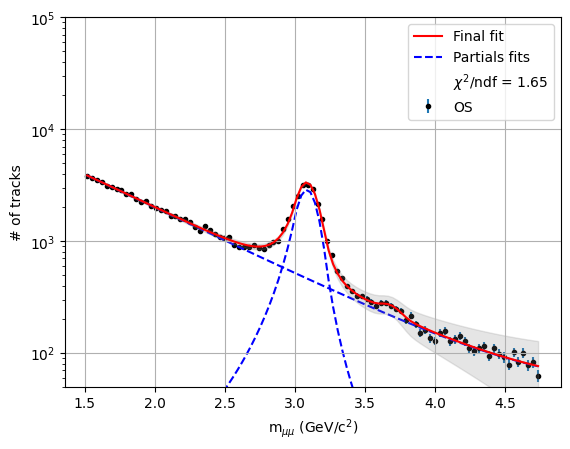

In [36]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func(x_fit, *popt)
plt.plot(x_fit, y_fit, '-r', zorder = 2, label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt[3:6]), '--b', zorder = 1)
plt.plot(x_fit, fixedFunc_bckg(x_fit, *popt[6:]), '--b', zorder = 1)

sigmas = np.absolute(np.diag(pcov))
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func(x_data, *popt)) / y_error) ** 2)
ndf = len(x_data) + len(popt) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.legend()
plt.yscale('log')
plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.ylim(50, 100000)
plt.grid(True)

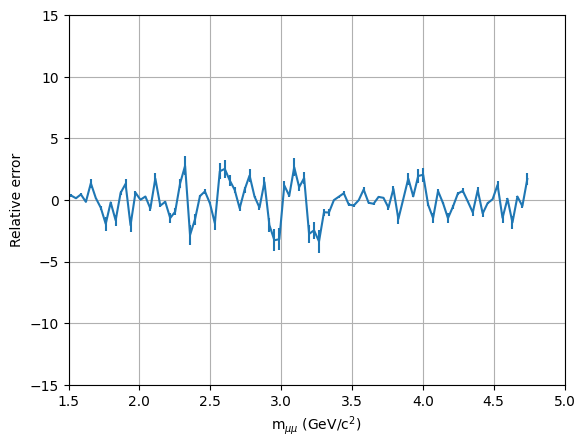

In [37]:
err = np.sqrt(nfev["fvec"]**2/(nfev["nfev"]-len(popt)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [38]:
def dCB2(pcov, x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )
    
    def dCB2dx(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: AL*N*nL/(sig*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: -N*(-2*mu + 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2), 
                             lambda x: -AR*N*nR/(sig*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])
    
    def dCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: AL/(BL - (-mu + x)/sig)**nL, 
                             lambda x: np.exp(-(-mu + x)**2/(2*sig**2)), 
                             lambda x: AR/(BR + (-mu + x)/sig)**nR])

    def dCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: -AL*N*nL/(sig*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: -N*(2*mu - 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2), 
                             lambda x: AR*N*nR/(sig*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])

    def dCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: -AL*N*nL*(-mu + x)/(sig**2*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: N*(-mu + x)**2*np.exp(-(-mu + x)**2/(2*sig**2))/sig**3, 
                             lambda x: AR*N*nR*(-mu + x)/(sig**2*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])
    
    def IdCB2dx(x, *args):
        return quad(dCB2dx, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dN(x, *args):
        return quad(dCB2dN, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dmu(x, *args):
        return quad(dCB2dmu, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dsig(x, *args):
        return quad(dCB2dsig, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    return np.sqrt(IdCB2dx(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * (((stop - start)/bins)/2)**2 \
                   + IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[0, 0] \
                   + IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[1, 1] \
                   + IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[2, 2] \
                   + 2 * IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[0, 1])) \
                   + 2 * IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[1, 2])) \
                   + 2 * IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[2, 1])))

N_JPsi = quad(fixedFunc_JPsi, start, stop, args = (*popt[:3], ))[0] / ((stop - start)/bins)
err_JPsi = dCB2(pcov[:3, :3], x_data, *popt[:3], *popt_JPsi[3:])
print(r"N_JPsi = ", N_JPsi, " +/- ", err_JPsi, "(stat.)")

N_JPsi =  19734.731047320107  +/-  554.801348601562 (stat.)
